On va diviser le positionnement des points en deux parties :
- l'angle
- la distance au centre
Qui sont tous les deux fonctions de la hauteur du point, tel que l'angle est décallé de a (initialement à 137.5°) et la distance est une fonction qu'on obtient à l'aide de la classe Goutt.

In [1]:
import numpy as np

import maroc.toolkit.toolkit as tk


offset = 137.4
def get_angle(h, offset= 137.5):
    return np.deg2rad(h * offset)

h = np.arange(100)
angles = get_angle(h)
# distances = get_distance(h)

pts = tk.rad2point((0.0,0.0), 1, angles)


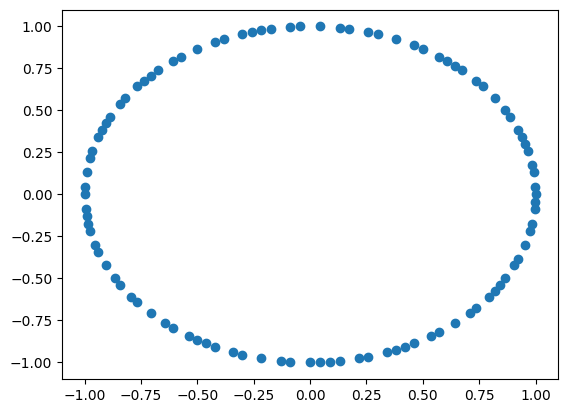

In [2]:
import matplotlib.pyplot as plt

plt.scatter(*np.array(pts))
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D

def get_angle(h, offset=137.5):
    """Get the angle for a given height"""
    return np.deg2rad(h * offset)

# Data setup


# The key change is making the plot update function completely self-contained
def update_plot(offset=137.5, npts=100):
    # Create new figure each time
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    h = np.arange(npts)
    # Calculate points
    angles = get_angle(h, offset)
    pts = tk.rad2point((0.0, 0.0), 1, angles)
    x, y = pts
    
    # Create new scatter plot
    ax.scatter(x, y, h / npts)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('h')
    
    plt.show()

# Interactive slider
offset_slider = FloatSlider(
    min=135, 
    max=140, 
    step=0.1, 
    value=137.5, 
    description='offset'
)

npts_slider = FloatSlider(
    min=10, 
    max=1000, 
    step=10, 
    value=100, 
    description='npts'
)

# Create interactive plot
interact(update_plot, offset=offset_slider, npts=npts_slider)

interactive(children=(FloatSlider(value=137.5, description='offset', max=140.0, min=135.0), FloatSlider(value=…

<function __main__.update_plot(offset=137.5, npts=100)>

# Donner un peu de forme à tout ça.

In [4]:
from maroc.goutte import goutte
import importlib
import numpy as np

import maroc.toolkit.toolkit as tk
# après avoir modifié ma_classe.py
importlib.reload(goutte)
# maintenant, la classe est mise à jour dans le notebook
# obj = ma_classe.MaClasse()
siz = 401
ang = float(np.deg2rad(37.0))
hei = 3/4*siz

goutte = goutte.Goutte(hei, ang, (siz/2, siz/2), width = 1)

In [5]:
print(f"top: {goutte.top_pt}")
print(f"right: {goutte.r_pt}")
print(f"bottom: {goutte.bot_pt}")



top: [200.5   350.875]
right: [269.19931998 145.55437541]
bottom: [200.5    50.125]


Du coup l'idée est de choper n points sur le flanc de l'arc.
Pour faire ça, on va s'inspirer de ce qu'on a fait pour le rendering.
L'entrée donc c'est n points dont les positions verticales sont comprises entre l'ordonnée du point bas et du point haut.
Ce qu'on veut, c'est la différence entre l'abscisse de ces points sur la goutte en ces ordonnées et l'ordonnée de l'axe central de la goutte dont l'abscisse est l'abscisse du point haut et du bas.

In [6]:
n = 100
min_h = goutte.bot_pt[1]
max_h = goutte.top_pt[1]
inter_h = goutte.r_pt[1]

hs = np.linspace(min_h, max_h, n)
up_pts = []
down_pts = []
# inter_h

In [7]:
# get the length of the line.
line_length = goutte.right_line.get_length()
harc_length = goutte.arc.get_length() / 2.0
total_length = line_length + harc_length
# plot the 3 lengths
print(f"line length: {line_length}")
print(f"half arc length: {harc_length}")
print(f"total length: {total_length}")
print("-------------")
lfrac = line_length / total_length
afrac = harc_length / total_length
print(f"line frac: {lfrac}")
print(f"half arc frac: {afrac}")


line length: 216.50901931949016
half arc length: 137.18384153993884
total length: 353.692860859429
-------------
line frac: 0.6121385056893729
half arc frac: 0.3878614943106271


Maintenant je dois récupérer les points sur la goutte.
soit n le nombre de points à placer.

In [8]:
import numpy as np
import math
n = 20
frac_points = n * lfrac
print(f"Il y a {np.round(frac_points, 2)} points à placer sur la ligne")
n_pts_line = math.floor(frac_points)
print(f"Comme on doit placer un nombre entier de points, il y a {n_pts_line} points à placer sur la ligne")
reste = frac_points - n_pts_line
print(f"Il reste {np.round(reste, 2)} de la distance entre 2 points entre le dernier point et la fin de la ligne")
print("--------------------------------")   
for i in range(1,n_pts_line+1):
    frac = i / frac_points
    pt = tk.interpolate_pts(goutte.top_pt, goutte.r_pt, frac)
    rpos = abs(goutte.top_pt[0] - pt[0])
    print(f"pt {i}: {rpos}, {frac}")

Il y a 12.24 points à placer sur la ligne
Comme on doit placer un nombre entier de points, il y a 12 points à placer sur la ligne
Il reste 0.24 de la distance entre 2 points entre le dernier point et la fin de la ligne
--------------------------------
pt 1: 5.611419584396771, 0.08168086067987412
pt 2: 11.222839168793513, 0.16336172135974825
pt 3: 16.834258753190284, 0.24504258203962237
pt 4: 22.445678337587026, 0.3267234427194965
pt 5: 28.057097921983797, 0.4084043033993706
pt 6: 33.66851750638057, 0.49008516407924474
pt 7: 39.27993709077731, 0.5717660247591189
pt 8: 44.89135667517405, 0.653446885438993
pt 9: 50.50277625957082, 0.7351277461188671
pt 10: 56.11419584396759, 0.8168086067987412
pt 11: 61.725615428364335, 0.8984894674786154
pt 12: 67.33703501276113, 0.9801703281584895


In [9]:
import maroc.lampe.arc as arc
importlib.reload(arc)

frac_points = n * afrac + reste
print(f"Il y a {np.round(frac_points, 2)} points à placer sur l'arc")
n_pts_arc = int(np.round(frac_points, 1))
print(f"Comme on doit placer un nombre entier de points, il y a {n_pts_arc} points à placer sur l'arc")
reste2 = frac_points - n_pts_arc
print(f"Il reste {np.round(reste2, 2)} de la distance entre 2 points entre le dernier point et la fin de l'arc")
print(f"Le premier point est à placer à {np.round(1.0 - reste, 2)} de la distance entre 2 points du début de l'arc")
print("--------------------------------")

offset = (1.0 - reste)
ang_start = goutte.arc.ang_start
ang_end = 3 * np.pi /2.0
test_arc = arc.Arc(
    center=goutte.arc.center,
    a = goutte.arc.a,
    b = goutte.arc.b,
    ang_start=ang_start,
    ang_end=ang_end
)
for i in range(n_pts_arc):
    print(f'pt: {n_pts_line+1+i}')
    # print(f"pt {i + offset}")
    frac = min((i + offset) / (n*afrac), 1.0)
    # print(f"frac: {frac}")
    ang = test_arc.interpolate(frac)
    # print(f"ang: {np.rad2deg(ang)}")
    pt = test_arc.rad2point(ang)
    # print(f"pt: {pt}")
    xpos = pt[0] - goutte.top_pt[0]
    print(f"xpos: {xpos}")


Il y a 8.0 points à placer sur l'arc
Comme on doit placer un nombre entier de points, il y a 8 points à placer sur l'arc
Il reste 0.0 de la distance entre 2 points entre le dernier point et la fin de l'arc
Le premier point est à placer à 0.76 de la distance entre 2 points du début de l'arc
--------------------------------
pt: 13
xpos: 71.75387631768956
pt: 14
xpos: 72.03564049035174
pt: 15
xpos: 68.04580575470652
pt: 16
xpos: 60.02096296474076
pt: 17
xpos: 48.43697253437759
pt: 18
xpos: 33.98074667178736
pt: 19
xpos: 17.509516577977422
pt: 20
xpos: 0.0


Maintenant, on fait la fonction, bitch.

In [10]:
def get_pts_on_goutte(goutte, n_pts):
    up_pts = []
    down_pts = []
    half_arc = init_half_arc(goutte)
    lfrac, afrac = get_len_fractions(goutte, half_arc)
    print(f"lfrac: {lfrac}, afrac: {afrac}")
    # get line points
    up_pts, reste = get_pts_on_line(goutte, n_pts, lfrac)
    # get half_arc points
    down_pts = get_pts_on_arc(half_arc, n_pts, afrac, reste)
    # return the concatenation of the two lists of points
    pts = up_pts + down_pts
    return pts

def init_half_arc(goutte):
    ang_start = goutte.arc.ang_start
    ang_end = 3 * np.pi /2.0
    half_arc = arc.Arc(
        center=goutte.arc.center,
        a = goutte.arc.a,
        b = goutte.arc.b,
        ang_start=ang_start,
        ang_end=ang_end
    )
    return half_arc
def get_pts_on_line(goutte, n_pts, lfrac):
    n_pts_line_frac = n_pts * lfrac
    n_pts_line = math.floor(n_pts_line_frac)
    reste = n_pts_line_frac - n_pts_line
    pts = []
    for i in range(1, int(n_pts_line_frac)+1):
        frac = i / n_pts_line_frac
        pt = list(tk.interpolate_pts(goutte.top_pt, goutte.r_pt, frac))
        pt[0] = pt[0] - goutte.top_pt[0]
        pts.append(pt)
        # print(f"pt {i}: {rpos}, {frac}")
    return pts, reste

def get_pts_on_arc(half_arc, n_pts, afrac, reste):
    n_pts_harc_frac = n_pts * afrac + reste
    offset = (1.0 - reste)
    n_pts_harc = int(
        np.round(n_pts_harc_frac, 1)
    )
    pts = []
    for i in range(n_pts_harc):
        # print(f'point n°: {n_pts_line+1+i}')
        # print(f"pt {i + offset}")
        frac = min((i + offset) / (n_pts_harc_frac), 1.0)
        # print(f"frac: {frac}")
        ang = half_arc.interpolate(frac)
        # print(f"ang: {np.rad2deg(ang)}")
        pt = list(half_arc.rad2point(ang))
        # print(f"pt: {pt}")
        pt[0] = pt[0] - half_arc.center[0]
        pts.append(pt)
        # print(f"xpos: {xpos}")
    return pts
def get_len_fractions(goutte, half_arc):
    line_length = goutte.right_line.get_length()
    harc_length = half_arc.get_length()
    total_length = line_length + harc_length
    lfrac = line_length / total_length
    afrac = harc_length / total_length
    return lfrac, afrac


In [11]:
n_pts=10
pts = get_pts_on_goutte(goutte, n_pts)
pts

lfrac: 0.612138505689373, afrac: 0.387861494310627


[[np.float64(11.222839168793513), np.float64(317.33346933694486)],
 [np.float64(22.445678337587026), np.float64(283.7919386738897)],
 [np.float64(33.66851750638054), np.float64(250.25040801083458)],
 [np.float64(44.89135667517405), np.float64(216.70887734777946)],
 [np.float64(56.11419584396759), np.float64(183.16734668472432)],
 [np.float64(67.33703501276108), np.float64(149.62581602166918)],
 [np.float64(72.12939010906888), np.float64(115.8354833798642)],
 [np.float64(61.126628542891524), np.float64(83.68976546285143)],
 [np.float64(36.6777142417595), np.float64(60.0961533617296)],
 [np.float64(4.16072618259787), np.float64(50.24458343391373)]]

# Merging des méthodes
Maintenant, je mélange les deux méthodes

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
import importlib

from maroc.goutte import goutte
import maroc.toolkit.toolkit as tk

importlib.reload(goutte)


def get_angle(h, offset=137.5):
    """Get the angle for a given height"""
    return np.deg2rad(h * offset)

# Data setup


# The key change is making the plot update function completely self-contained
def update_plot(offset=137.5, npts=100, elev=0):
    npts = int(npts)
    # Create new figure each time
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    h = np.arange(npts)
    # Calculate points
    angles = get_angle(h, offset)
    pts1 = get_pts_on_goutte(goutte, npts)
    pts1 = np.array(pts1)
    # assert pts1.shape == angles.shape
    pts2 = tk.rad2point(
        center=(0.0, 0.0), 
        rad=pts1[:,0], 
        angle=angles
    )
    x, y = pts2


    # Create new scatter plot
    ax.scatter(x, y, pts1[:,1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('h')
    ax.view_init(elev=elev, azim=45)  # elev is vertical angle, azim is horizontal rotation
    # make x and y axes go in the interval [-1, 1]
    w = 175
    ax.set_xlim(-w, w)
    ax.set_ylim(-w, w)
    plt.show()

# Interactive slider
offset_slider = FloatSlider(
    min=135, 
    max=140, 
    step=0.1, 
    value=137.5, 
    description='offset'
)

npts_slider = FloatSlider(
    min=10, 
    max=1000, 
    step=10, 
    value=100, 
    description='npts'
)
elev_slider = FloatSlider(
    min=-90, 
    max=90, 
    step=1, 
    value=0, 
    description='elev'
)
siz = 401
ang = float(np.deg2rad(40.0))
hei = 3/4*siz

goutte = goutte.Goutte(hei, ang, (siz/2, siz/2), width = 1)

# Create interactive plot
interact(update_plot, offset=offset_slider, npts=npts_slider, elev=elev_slider)


interactive(children=(FloatSlider(value=137.5, description='offset', max=140.0, min=135.0), FloatSlider(value=…

<function __main__.update_plot(offset=137.5, npts=100, elev=0)>